### 2. 什么是感知机分类

In [1]:
import pandas as pd

df = pd.read_csv('../data/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [2]:
import numpy as np

# 只选择两个种类，把类别字符改为 -1 和 1, 方便画图
y = df.iloc[0:100, 4].values
y = np.where(y == 'Setosa', -1, 1)

# 只选择前两列变量
X = df.iloc[0:100, [0, 2]].values


In [3]:
X[:5]

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4]])

In [4]:
y[:5]

array([-1, -1, -1, -1, -1])

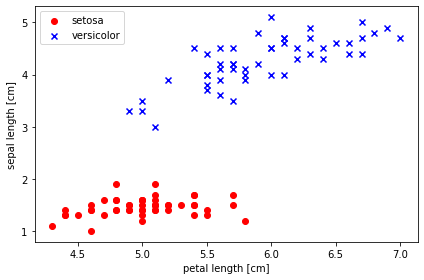

In [5]:
# 将两个分类先可视化
%matplotlib inline
import matplotlib.pyplot as plt


plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('petal length [cm]')
plt.ylabel('sepal length [cm]')
plt.legend(loc='upper left')

plt.tight_layout()

In [6]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(max_iter=40, eta0=0.1, random_state=0)
ppn.fit(X, y)

Perceptron(eta0=0.1, max_iter=40)

In [7]:
new_x = np.array([[5.3, 1.2]])

ppn.predict(new_x)

array([-1])

In [8]:
w1, w2 = ppn.coef_[0]
print("w1:",w1,"\n""w2:",w2)

w1: -0.5 
w2: 1.0899999999999999


In [9]:
b = ppn.intercept_[0]

In [10]:
print("b:",b)

b: -0.2


In [11]:
a = -w1/w2

In [12]:
line_x = np.linspace(4,7,100)
line_y = line_x*a - b

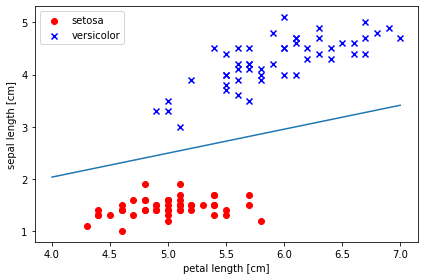

In [13]:
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')
plt.plot(line_x,line_y)
plt.xlabel('petal length [cm]')
plt.ylabel('sepal length [cm]')
plt.legend(loc='upper left')

plt.tight_layout()


### 3. 参数如何训练出来

In [14]:
class Perceptron(object):
    # 在初始方法中定义类的两个参数
    # 一个参数是学习率eta、另一个是n_iter，表示学习数据的次数
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter  

    # 对输入的X和权重W进行加权求和的过程
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    # 训练函数
    def fit(self, X, y):
        self.w_ = np.random.rand(1 + X.shape[1])  # 权重, 初始值为0
        self.errors_ = []       
        # 整体训练n_iter轮
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y): # 循环遍历每个样本
                update = self.eta * (target - self.predict(xi))  
                self.w_[1:] += update * xi #修正权重
                self.w_[0] += update
                errors += int(update != 0.0)  # 观察分类是否错误
            self.errors_.append(errors)  # 收集这些错误的分类结果
        return self

    # 预测函数
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [15]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
ppn.errors_

[2, 3, 1, 0, 0, 0, 0, 0, 0, 0]

In [16]:
ppn.w_

array([-0.07202635, -0.84083907,  1.707266  ])

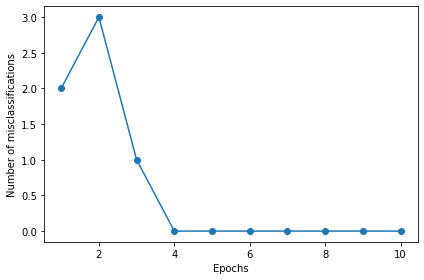

In [17]:
# error 画图, 检查是否 error 趋近于0 在多次 loop 更新后
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')

plt.tight_layout()

### 练习

C:\Users\xccds\AppData\Local\Temp\ipykernel_24404\2799033622.py:5: RuntimeWarning: divide by zero encountered in log10
  ax[0].plot(range(1, len(ppn1.errors_) + 1), np.log10(ppn1.errors_), marker='o')


Text(0.5, 1.0, 'Adaline - Learning rate 0.01')

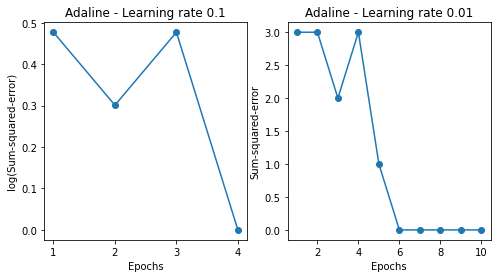

In [20]:
# 测试两种 learning rate, 0.1 和 0.01
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

ppn1 = Perceptron(n_iter=10, eta=0.1).fit(X,y)
ax[0].plot(range(1, len(ppn1.errors_) + 1), np.log10(ppn1.errors_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.1')

ppn2 = Perceptron(n_iter=10, eta=0.01).fit(X,y)
ax[1].plot(range(1, len(ppn2.errors_) + 1), ppn2.errors_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.01')